# Homework 2 (Due Thursday Dec 1, 6:29pm PST)

Please submit as a notebook in the format `HW2_FIRSTNAME_LASTNAME_USCID.ipynb` in a group chat to me and the TAs.

Your `USCID` is your student 10-digit ID.

### Part I.  Topic Modelling and Analysis (5pts)

Pick from **one** of the dataset options below:
* **Negative McDonalds Yelp reviews**: `datasets/mcdonalds-yelp-negative-reviews.csv`
* **[Top 5000 Udemy courses](https://www.kaggle.com/datasets/90eededa5561eee7f62c0e68ecdad14c2bdb58bc923834067025dee655a6083e?resource=download)** - a Kaggle dataset of the course descriptions of the top 5000 Udemy courses in 2022: `datasets/top5000_udemy.csv`

In your notebook, explore the data and perform topic modelling. You may use any vectorization or text preprocessing techniques we have discussed.

In order to earn full credit, you must:

* Show the **# of topics you tried, and explain why you ultimately decided on the final #**.
* Demonstrate **adequate text preprocessing (there are likely obvious stopwords / fuzzy matching / regex groupings that can be done to improve the final results)** - show what you tried.
* In 2-3 sentences: A **business analysis of these topics - what do they reveal as actionable next steps or insights for McDonalds or Udemy?** Please be specific in your recommendations/insights.
    - **Not specific**: *We recommend Amazon look into the quality of their toys, since the reviews show disatisfaction with the value of their product.*
    - **Specific**: *Amazon should explore more durable batteries/hardwares. For example, X% of reviews mention that the toys' batteries were broken or immediately died. This is part of a larger theme of components not being ready to use out the box, which often leads to disappointment on holiday occasions when children open up their gifts. See the following document snippets as examples:...*

#### 1. Loading Data 

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
reviews = pd.read_csv("../datasets/mcdonalds-yelp-negative-reviews.csv", encoding='latin-1')
text = reviews["review"].values

### 2. Data Cleaning and Text Preprocessing

In [44]:
# Clean out the different ways of saying mcdonalds to a standard form 


# Clean out the different ways of saying drive through to a standard form 



In [45]:
reviews['reviews_processed'] = reviews['review']

# Remove punctuation
from textacy.preprocessing.remove import punctuation
reviews['reviews_processed'] = reviews['reviews_processed'].apply(punctuation)

# Convert to lowercase 
reviews['reviews_processed'] = reviews['reviews_processed'].map(lambda x: x.lower())

# Replace common entities/concepts 
from textacy.preprocessing.replace import urls, hashtags, numbers, emails, emojis, currency_symbols
reviews['reviews_processed'] = reviews['reviews_processed'].\
 apply(urls).\
 apply(hashtags).\
 apply(currency_symbols).\
 apply(emojis).\
 apply(emails)
# apply(numbers)
# we won't remove numbers because it gives us valuable information 

# Remove or normalize undesired text elements 
#from collections import Counter
#from textacy.preprocessing.normalize import quotation_marks, bullet_points
#quotes = ['"','“','”']

reviews.head(10)


,_unit_id,city,review,reviews_processed
0,679455653,Atlanta,"I'm not a huge mcds lover, but I've been to better ones. This is by far the worst one I've ever been too! It's filthy inside and if you get drive through they completely screw up your order every time! The staff is terribly unfriendly and nobody seems to care.",i m not a huge mcds lover but i ve been to better ones this is by far the worst one i ve ever been too it s filthy inside and if you get drive through they completely screw up your order every time the staff is terribly unfriendly and nobody seems to care
1,679455654,Atlanta,"Terrible customer service. I came in at 9:30pm and stood in front of the register and no one bothered to say anything or help me for 5 minutes. There was no one else waiting for their food inside either, just outside at the window. I left and went to Chickfila next door and was greeted before I was all the way inside. This McDonalds is also dirty, the floor was covered with dropped food. Obviously filled with surly and unhappy workers.",terrible customer service i came in at 9 30pm and stood in front of the register and no one bothered to say anything or help me for 5 minutes there was no one else waiting for their food inside either just outside at the window i left and went to chickfila next door and was greeted before i was all the way inside this mcdonalds is also dirty the floor was covered with dropped food obviously filled with surly and unhappy workers
2,679455655,Atlanta,"First they ""lost"" my order, actually they gave it to someone one else than took 20 minutes to figure out why I was still waiting for my order.They after I was asked what I needed I replied, ""my order"".They asked for my ticket and the asst mgr looked at the ticket then incompletely filled it.I had to ask her to check to see if she filled it correctly.She acted as if she couldn't be bothered with that so I asked her again.She begrudgingly checked to she did in fact miss something on the ticket.So after 22 minutes I finally had my breakfast biscuit platter.As I left an woman approached and identified herself as the manager, she was dressed as if she had just awoken in an old t-shirt and sweat pants.She said she had heard what happened and said she'd take care of it.Well why didn't she intervene when she saw I was growing annoyed with the incompetence?",first they lost my order actually they gave it to someone one else than took 20 minutes to figure out why i was still waiting for my order they after i was asked what i needed i replied my order they asked for my ticket and the asst mgr looked at the ticket then incompletely filled it i had to ask her to check to see if she filled it correctly she acted as if she couldn t be bothered with that so i asked her again she begrudgingly checked to she did in fact miss something on the ticket so after 22 minutes i finally had my breakfast biscuit platter as i left an woman approached and identified herself as the manager she was dressed as if she had just awoken in an old t shirt and sweat pants she said she had heard what happened and said she d take care of it well why didn t she intervene when she saw i was growing annoyed with the incompetence
3,679455656,Atlanta,I see I'm not the only one giving 1 star. Only because there is not a -25 Star!!! That's all I need to say!,i see i m not the only one giving 1 star only because there is not a 25 star that s all i need to say
4,679455657,Atlanta,"Well, it's McDonald's, so you know what the food is. This review reflects solely on the poor service. I have been to this location countless times over the years. They consistently fail on the service end of things. The order takers tend to be rude, no smiles, and a lot of ""sighs"" and ""lip smacking"" when you talk to them. So why go back you ask? This store benefits from being the only place to eat in this area. The next stop is at least 12 minutes away on the other side of town. Also I strongly believe in 2nd chances and know 

In [46]:
# Lemmatization 
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


# Shoutout to this git repo for providing this code 
# https://gist.github.com/gaurav5430/9fce93759eb2f6b1697883c3782f30de
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

reviews['reviews_processed'] = reviews['reviews_processed'].apply(lemmatize_sentence)

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - '/Users/matthewlee/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [47]:
pd.set_option('display.max_colwidth', None)

#### Exploratory Data Analysis

In [48]:
pip install wordcloud

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


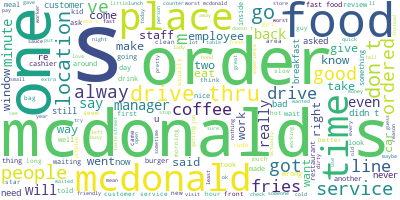

In [49]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(reviews['reviews_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
# We are using the word cloud to figure out which extra stopwords to add to our stopword bank 
wordcloud.to_image()

In [50]:


# Add words to the stopwords 
# worst, worst ever, awful, terrible, bad, terrible, look like, mcdonalds, fast food, location, don't, want, review  

In [51]:
# Removing stopwords using gensim 
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import STOPWORDS

all_stopwords_gensim = STOPWORDS.union(set(['mcdonald', 'look like', 'location', 's']))

reviews['reviews_processed'] = reviews['reviews_processed'].apply(remove_stopwords)
reviews[['review',"reviews_processed"]].head(10)

# Add custom stopwords to improve our result 
# Credit to this stackoverflow page: 
# https://stackoverflow.com/questions/26826002/adding-words-to-stop-words-list-in-tfidfvectorizer-in-sklearn
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
stop.extend('fast food look like mcdonald mcdonalds bad'.split())


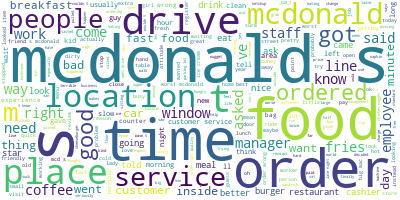

In [52]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(reviews['reviews_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
# We are using the word cloud to figure out which extra stopwords to add to our stopword bank 
wordcloud.to_image()

In [53]:
# Vectorize the corpus 
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(3,3), min_df=3,
                            max_df=0.4, stop_words=set(stop))

X, terms = vectorizer.fit_transform(reviews['reviews_processed']), vectorizer.get_feature_names_out()
tf_idf = pd.DataFrame(X.toarray(), columns=terms)

print(f"TF-IDF: {tf_idf.shape}")
tf_idf.head(5)

TF-IDF: (1525, 126)


,10 minutes fries,10 minutes later,10 minutes order,10 piece chicken,15 minutes drive,15 minutes later,20 minutes drive,20 minutes order,24 hour drive,attached gas station,...,waiting 15 minutes,waiting 30 minutes,want ice cream,wanted chicken nuggets,went drive ordered,went inside order,window asked order,wish negative stars,worst customer service,worst service experienced
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Fit the NMF Model
nmf = NMF(n_components=3)
W = nmf.fit_transform(X)
H = nmf.components_
print(f"Original shape of X is {X.shape}")
print(f"Decomposed W matrix is {W.shape}")
print(f"Decomposed H matrix is {H.shape}")

Original shape of X is (1525, 126)
Decomposed W matrix is (1525, 3)
Decomposed H matrix is (3, 126)


In [55]:
from typing import List
import numpy as np
# Report Results 
def get_top_tf_idf_tokens_for_topic(H: np.array, feature_names: List[str], num_top_tokens: int = 5):
  """
  Uses the H matrix (K components x M original features) to identify for each
  topic the most frequent tokens.
  """
  for topic, vector in enumerate(H):
    print(f"TOPIC {topic}\n")
    total = vector.sum()
    top_scores = vector.argsort()[::-1][:num_top_tokens]
    token_names = list(map(lambda idx: feature_names[idx], top_scores))
    strengths = list(map(lambda idx: vector[idx] / total, top_scores))
    
    for strength, token_name in zip(strengths, token_names):
      print(f"\b{token_name} ({round(strength * 100, 1)}%)\n")
    print(f"=" * 50)

get_top_tf_idf_tokens_for_topic(H, tf_idf.columns.tolist(), 3)

TOPIC 0

open 24 hours (57.6%)

drive open 24 (11.8%)

bacon egg cheese (3.9%)

TOPIC 1

got order wrong (51.7%)

ordered chicken mcnuggets (6.6%)

order wrong time (6.1%)

TOPIC 2

worst customer service (63.6%)

drive order wrong (7.9%)

person taking order (6.7%)



In [56]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3)
W = lda.fit_transform(X)
H = lda.components_
get_top_tf_idf_tokens_for_topic(H, tf_idf.columns.tolist(), 3)

TOPIC 0

worst customer service (4.0%)

sweet sour sauce (3.7%)

waited 10 minutes (3.2%)

TOPIC 1

open 24 hours (7.6%)

got order wrong (6.4%)

took 20 minutes (4.5%)

TOPIC 2

ice cream machine (4.5%)

24 hour drive (4.2%)

terrible customer service (4.2%)



In [57]:
# We want to look at top topics for each city to give more targeted recommendations 
# Replace rows with missing cities with "Missing City"
reviews['city'].fillna('Missing City', inplace = True)

# Save a list of cities in our dataset for for loop later 
city_list = list(reviews['city'].unique())
city_list

['Atlanta',
 'Las Vegas',
 'Dallas',
 'Portland',
 'Chicago',
 'Cleveland',
 'Houston',
 'Los Angeles',
 'New York',
 'Missing City']

In [58]:
import warnings
warnings.filterwarnings("ignore")

vectorizer = TfidfVectorizer(ngram_range=(2,3), min_df=3,
                            max_df=0.4, stop_words=set(stop))

# Breakdown by city using NMF

for city in city_list:
    print(city)
    reviews_city = reviews[reviews['city']==city]
    X, terms = vectorizer.fit_transform(reviews_city['reviews_processed']), vectorizer.get_feature_names_out()
    tf_idf = pd.DataFrame(X.toarray(), columns=terms)
    nmf = NMF(n_components=3)
    W = nmf.fit_transform(X)
    H = nmf.components_
    get_top_tf_idf_tokens_for_topic(H, tf_idf.columns.tolist(), 3)

    

Atlanta
TOPIC 0

customer service (37.0%)

placed order (7.9%)

play area (7.2%)

TOPIC 1

northside hospital (48.4%)

ice cream (29.8%)

particular location (7.7%)

TOPIC 2

order wrong (23.8%)

10 minutes (22.7%)

went inside (9.3%)

Las Vegas
TOPIC 0

customer service (21.2%)

las vegas (4.1%)

late night (3.1%)

TOPIC 1

big mac (20.3%)

ordered big mac (3.3%)

ordered big (3.2%)

TOPIC 2

order right (14.5%)

got order (4.3%)

chicken nuggets (3.9%)

Dallas
TOPIC 0

customer service (68.0%)

play area (11.7%)

big mac (11.7%)

TOPIC 1

parking lot (100.0%)

order wrong (0.0%)

order right (0.0%)

TOPIC 2

15 minutes (99.9%)

order wrong (0.0%)

order right (0.0%)

Portland
TOPIC 0

went drive (100.0%)

second time (0.0%)

parking lot (0.0%)

TOPIC 1

customer service (100.0%)

24 hours (0.0%)

24 hour (0.0%)

TOPIC 2

drive window (53.6%)

second time (15.9%)

chicken sandwich (14.3%)

Chicago
TOPIC 0

parking lot (49.2%)

went drive (4.8%)



In [59]:
# Breakdown by city using LDA 
vectorizer = TfidfVectorizer(ngram_range=(2,3), min_df=3,
                            max_df=0.4, stop_words=set(stop))

for city in city_list:
    print(city)
    reviews_city = reviews[reviews['city']==city]
    X, terms = vectorizer.fit_transform(reviews_city['reviews_processed']), vectorizer.get_feature_names_out()
    tf_idf = pd.DataFrame(X.toarray(), columns=terms)
    lda = LatentDirichletAllocation(n_components=3)
    W = lda.fit_transform(X)
    H = lda.components_
    get_top_tf_idf_tokens_for_topic(H, tf_idf.columns.tolist(), 3)

Atlanta
TOPIC 0

way work (8.1%)

went store (7.7%)

drive window (7.6%)

TOPIC 1

northside hospital (10.3%)

ice cream (10.1%)

order wrong (9.8%)

TOPIC 2

customer service (16.8%)

10 minutes (11.1%)

waiting order (8.3%)

Las Vegas
TOPIC 0

big mac (2.6%)

order right (2.4%)

15 minutes (1.7%)

TOPIC 1

las vegas (3.1%)

order wrong (2.5%)

ice cream (2.5%)

TOPIC 2

customer service (4.2%)

went drive (2.2%)

chicken nuggets (2.2%)

Dallas
TOPIC 0

customer service (39.4%)

parking lot (29.1%)

big mac (22.3%)

TOPIC 1

order wrong (37.5%)

order right (37.5%)

customer service (4.2%)

TOPIC 2

15 minutes (32.8%)

play area (30.9%)

drive window (23.5%)

Portland
TOPIC 0

went drive (27.5%)

drive window (25.4%)

french fries (17.6%)

TOPIC 1

customer service (31.6%)

chicken sandwich (26.2%)

24 hour (22.1%)

TOPIC 2

parking lot (24.5%)

24 hours (22.2%)

big mac (18.5%)

Chicago
TOPIC 0

parking lot (10.3%)

chicken nuggets (4.4%)

red l

In [60]:
import numpy as np
def get_top_documents_for_each_topic(W: np.array, documents: List[str], num_docs: int = 5):
    sorted_docs = W.argsort(axis=0)[::-1]
    top_docs = sorted_docs[:num_docs].T
    per_document_totals = W.sum(axis=1)
    for topic, top_documents_for_topic in enumerate(top_docs):
        print(f"Topic {topic}")
        for doc in top_documents_for_topic:
            score = W[doc][topic]
            percent_about_topic = round(score / per_document_totals[doc] * 100, 1)
            print(f"{percent_about_topic}%", documents[doc])
            print("=" * 50)

In [61]:
get_top_documents_for_each_topic(W, reviews['review'].tolist())

Topic 0
75.1% The worst McDonalds ever. Complete chaos. The prices are higher than the average and they don't have all of the regular items like lattes or fraps. The staff seems to be uninterested in taking or completing your order. It is as if they are aware that you are pretty much at their mercy.
73.6% The customer service was HORRIBLE! They seemed angry to work here and they would get upset if you ask for more ketchup or condiments. Also, the kids play area was filthy. It had old dirty food on the floor and it was full of lint. Stay away from this location.
71.6% I've gone to this McDonald's several times and they've gotten my order completely wrong. I go there before work around 7:30 so I'm very hungry and I order a bacon egg and cheese biscuit... Once I get to work I find what is in my bag is actually an egg mcmuffin...I absolutely hate those..so of course it's too late for me to drive back and get my correct order. I dont expect this to happen and its a elveru bisy mcdonalds so 

In [62]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3)
W = lda.fit_transform(X)
H = lda.components_
get_top_tf_idf_tokens_for_topic(H, tf_idf.columns.tolist(), 3)

TOPIC 0

ice cream (19.0%)

speak english (16.0%)

taking order (14.7%)

TOPIC 1

place order (18.2%)

30 minutes (11.2%)

placed order (10.6%)

TOPIC 2

customer service (26.8%)

good service (14.1%)

late night (13.4%)



In [63]:
get_top_documents_for_each_topic(W, reviews['review'].tolist())

Topic 0
75.5% Just sat at drive thru several minutes no one is answering. I can see employees walking around and it is 5:48 am and they should be open. I wonder if this franchises owner is aware that he is losing business due to this. I bet they do and dont care.
66.6% Little bit more expensive than other Mickey Dee's. Beggars can't be choosy. Slow service and it's packed. its open 24/7/365. and the workers are pretty nice. didn't have many other choices and this filled the need.
66.6% I would honestly not normally take the time to review a McDonald's location since I'm only really a fan of their breakfast, but this place has some serious issues. Apparently the difference between "sausage and egg" and "sausage egg and cheese" is not obvious/important to whoever they have bagging orders, even though they are two distinctly different items ON THEIR MENU! I have been down the road at least three times now only to find that they've given me the wrong biscuit - even when the correct one is 

In [64]:
for city in city_list:
    print(city)
    reviews_city = reviews[reviews['city']==city]
    X, terms = vectorizer.fit_transform(reviews_city['reviews_processed']), vectorizer.get_feature_names_out()
    tf_idf = pd.DataFrame(X.toarray(), columns=terms)
    nmf = NMF(n_components=3)
    W = nmf.fit_transform(X)
    H = nmf.components_
    get_top_documents_for_each_topic(W, reviews['review'].tolist())

Atlanta
Topic 0
100.0% Terrible customer service. I came in at 9:30pm and stood in front of the register and no one bothered to say anything or help me for 5 minutes. There was no one else waiting for their food inside either, just outside at the window.  I left and went to Chickfila next door and was greeted before I was all the way inside. This McDonalds is also dirty, the floor was covered with dropped food. Obviously filled with surly and unhappy workers.
100.0% Food is what you would expect from McDonald's but the management and staff could use some coaching in customer service. I come to this restaurant frequently in the mornings & the manager always seems to have a surly attitude. He acts as though he is doing you a big favor to wait on you and even take your money
100.0% THIS MCDONALDS IS HORRIBLE! They are also down the street from my house. You might just want to go to the next McDonald's down the street, less than half a mile maybe. It's brand new and just opened. The review

### Part II. Emotion Classification (5 pts)

Use the `datasets/emotions_dataset.zip` (see the original Dataset source on [Kaggle](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp)) to build a classification model that predicts the emotion of sentence. If you would like, you may classify only the top 4 emotions, and group all other classes as `Other`. 

In order to earn full credit, you must:

* Show the performance of your model with `CountVectorizer`, `TfIdfVectorizer`, `word2vec`, and `glove` embeddings.
    - for `word2vec`, make sure not to use the `en_core_web_sm` dataset (these are not real embeddings)
* Perform text preprocessing (or explain why it was not necessary):
    - stopword removal
    - ngram tokenization
    - stemming/lemmatization
    - fuzzy matching / regex cleaning / etc. (as you deem necessary, but show that you analyzed the text to make your decision)
* Show **AUROC / F1 scores** for on the holdout (test + validation) datasets.
* A brief discussion (2-3 sentences) of what could improve your model and why.

### 1. Importing Datasets 

In [65]:
train_df = pd.read_csv('../datasets/emotions/train.txt',header=None, names=['text'])
train_df[['text','emotion']] = train_df['text'].str.split(';',expand=True)
train_df['type'] = "train"
test_df = pd.read_csv('../datasets/emotions/test.txt',header=None, names=['text'])
test_df[['text','emotion']] = test_df['text'].str.split(';',expand=True)
test_df['type'] = "test"
val_df = pd.read_csv('../datasets/emotions/val.txt',header=None, names=['text'])
val_df[['text','emotion']] = val_df['text'].str.split(';',expand=True)
val_df['type'] = "val"

df = train_df.append(test_df.append(val_df , ignore_index=True) , ignore_index=True)

df.head()

,text,emotion,type
0,i didnt feel humiliated,sadness,train
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness,train
2,im grabbing a minute to post i feel greedy wrong,anger,train
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love,train
4,i am feeling grouchy,anger,train


In [66]:
# Checking if all the data have been appended correctly
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)
print(df.shape)

print(df['type'].unique())

(16000, 3)
(2000, 3)
(2000, 3)
(20000, 3)
['train' 'test' 'val']


### 2. Text Preprocessing


In [67]:
# Removing stopwords using gensim 
from gensim.parsing.preprocessing import remove_stopwords
df['text_clean'] = df['text'].apply(remove_stopwords)
df.head(10)

,text,emotion,type,text_clean
0,i didnt feel humiliated,sadness,train,didnt feel humiliated
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness,train,feeling hopeless damned hopeful cares awake
2,im grabbing a minute to post i feel greedy wrong,anger,train,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love,train,feeling nostalgic fireplace know property
4,i am feeling grouchy,anger,train,feeling grouchy
5,ive been feeling a little burdened lately wasnt sure why that was,sadness,train,ive feeling little burdened lately wasnt sure
6,ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny,surprise,train,ive taking milligrams times recommended ive fallen asleep lot faster feel like funny
7,i feel as confused about life as a teenager or as jaded as a year old man,fear,train,feel confused life teenager jaded year old man
8,i have been with petronas for years i feel that petronas has performed well and made a huge profit,joy,train,petronas years feel petronas performed huge profit
9,i feel romantic too,love,train,feel romantic


#### Word2Vec Build Classification Model ####

In [68]:
import spacy
# load the language model, but we disable the ner (named entity recognition) and parser (dependency parser)
# since we don't need them for our use case to speed things up
nlp = spacy.load('en_core_web_md', disable = ['ner', 'parser'])

In [69]:
import numpy as np
def process_text(text):
  """
  This function will use Spacy to perform stopword removal and lemmatization.
  """
  doc = nlp(text)
  processed_text = " ".join([token.lemma_ for token in doc if not token.is_stop])
  # this will get the word2vec embeddings for the processed text (the average of each token in the doc's word2vec embeddings)
  return np.array(nlp(processed_text).vector)

In [70]:
# use pandas' apply(...) method to apply this process_text function to each row's text field
df["vectors"] = df.text.apply(process_text)

In [71]:
X = np.array([vector for vector in df["vectors"]])
y = df["emotion"]

In [72]:
X.shape

(20000, 300)

#### Split into Training/Testing #### 

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [75]:
print(f"Training dataset is {X_train.shape}")
print(f"Training target is {y_train.shape}")
print(f"Test dataset is {X_test.shape}")
print(f"Test target is {y_test.shape}")

Training dataset is (15000, 300)
Training target is (15000,)
Test dataset is (5000, 300)
Test target is (5000,)


In [76]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)
training_predictions = logistic_regression.predict(X_train)
training_predictions[:5] # these are our model's prediction for first 5 documents in the training dataset

array(['fear', 'joy', 'joy', 'joy', 'love'], dtype=object)

In [77]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train, training_predictions)

array([[1037,  122,  303,   36,  512,   19],
       [ 132,  859,  308,   35,  388,   40],
       [ 156,  137, 4038,  181,  520,   38],
       [  47,   33,  511,  500,  128,    2],
       [ 278,  199,  653,   53, 3151,   40],
       [  18,   58,  153,    3,   92,  220]])

In [78]:
# we get 65.3% accuracy on the training data using word2vec 
logistic_regression.score(X_train, y_train)

0.6536666666666666

In [79]:
# we got 62.7% accuracy on the test data
logistic_regression.score(X_test, y_test)

0.6276

AUROC (Area Under the Receiver Operator Curve)

In [90]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, training_predictions)

ValueError: could not convert string to float: 'fear'

#### TF-IDF Weighted Word Embedding Model #### 

In [80]:
import pandas as pd
import spacy

# load spacy en_core_web_md model
nlp = spacy.load("en_core_web_md")

In [84]:
text = list(df['text_clean'].values)
text[:5]

['didnt feel humiliated',
 'feeling hopeless damned hopeful cares awake',
 'im grabbing minute post feel greedy wrong',
 'feeling nostalgic fireplace know property',
 'feeling grouchy']

In [86]:
for idx, text in enumerate(text):
    print(nlp(text))
    print(nlp(text).vector[:10]) 
    
    if idx == 5: # stop printing after first 5 or so, takes a long time!
        break


d
[ 1.3807    1.403     6.3916   -5.7252    0.55822  -6.909    -0.44916
 -0.68567   1.1024   -0.024417]
i
[  2.1387   -2.8931   -2.998    -9.5886  -14.661    -1.7485   -0.31449
   5.6111  -11.32      9.2488 ]
d
[ 1.3807    1.403     6.3916   -5.7252    0.55822  -6.909    -0.44916
 -0.68567   1.1024   -0.024417]
n
[ 1.806    8.2219   7.4174  -2.5894   2.2184  -0.46266 -2.2289  -8.9725
 -6.4521  -1.5152 ]
t
[  0.049813   9.9706    -9.7731    -6.8613    -1.8766     0.8864
  -0.9412    -3.7       -2.7037   -14.79    ]
 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)

tf_idf_lookup_table = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())


ValueError: Iterable over raw text documents expected, string object received.